# ETL Project

### Scraping Covid data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup

### Worldmeters site provide daily covid cases

###### https://www.worldometers.info/coronavirus/

In [2]:
url = requests.get('https://www.worldometers.info/coronavirus/')

soup = BeautifulSoup(url.text, 'html.parser')

In [3]:
row = []
country = []
total_cases = []
total_deaths = []
total_recovered = []
active_cases = []
critical = []
cases_1M_pop = [] 
deaths_1M_pop = []
total_tests = []
tests_1M_pop = []
population = []

for table in soup.find_all('table', attrs={'id':'main_table_countries_today'}):
  for table_body in table.find_all('tbody'):
    for rows in table_body.find_all('tr'):
      row.append(rows)

for t in row:
  columns = t.find_all('td')
  columns = [comma.text.strip() for comma in columns]
  country.append(columns[1])
  total_cases.append(columns[2])
  total_deaths.append(columns[4])
  total_recovered.append(columns[6])
  active_cases.append(columns[7])
  critical.append(columns[8])
  cases_1M_pop.append(columns[9])
  deaths_1M_pop.append(columns[10])
  total_tests.append(columns[11])
  tests_1M_pop.append(columns[12])
  population.append(columns[13])

### Transforming the scraped data in a dataframe

In [4]:
tabela = {'Country' : country, 'Total Cases' : total_cases, 'Total Deaths' : total_deaths, 'Total Recovered' : total_recovered, 'Active Cases' : active_cases,
          'Critical Cases' : critical, 'Cases/1M Pop' : cases_1M_pop, 'Deaths/1M Pop' : deaths_1M_pop, 'Total Tests' : total_tests, 'Tests/1M Pop' : tests_1M_pop,
          'Population' : population}

df = pd.DataFrame(tabela)

In [5]:
df

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Critical Cases,Cases/1M Pop,Deaths/1M Pop,Total Tests,Tests/1M Pop,Population
0,North America,"35,627,823","815,057","27,282,612","+68,620","7,530,154","15,172",,,,
1,South America,"20,811,792","540,550","18,521,290","+64,303","1,749,952","20,152",,,,
2,Asia,"27,994,962","424,216","25,764,679","+118,596","1,806,067","25,091",,,,
3,Europe,"39,032,598","902,345","27,541,194","+96,773","10,589,059","30,523",,,,
4,Africa,"4,217,257","112,125","3,785,290","+5,510","319,842","2,726",,,,
...,...,...,...,...,...,...,...,...,...,...,...
232,Total:,"39,032,598","902,345","27,541,194","+96,773","10,589,059","30,523",,,,
233,Total:,"4,217,257","112,125","3,785,290","+5,510","319,842","2,726",,,,
234,Total:,"56,119","1,127","34,528",+1,"20,464",6,,,,
235,Total:,721,15,706,,0,0,,,,


### Data cleaning and transformation

In [6]:
df = df.apply(lambda x: x.replace('', '0'))

In [7]:
for i in df.columns:
  df[i] = df[i].apply(lambda x: x.replace(',', ''))
  df[i] = df[i].apply(lambda x: x.replace('+', ''))
  df[i] = df[i].apply(lambda x: x.replace('N/A', '0'))

In [8]:
df['Country'].values

array(['North America', 'South America', 'Asia', 'Europe', 'Africa',
       'Oceania', '0', 'World', 'USA', 'Brazil', 'India', 'France',
       'Russia', 'UK', 'Italy', 'Spain', 'Turkey', 'Germany', 'Colombia',
       'Argentina', 'Poland', 'Mexico', 'Iran', 'Ukraine', 'South Africa',
       'Peru', 'Czechia', 'Indonesia', 'Netherlands', 'Chile', 'Canada',
       'Romania', 'Belgium', 'Iraq', 'Israel', 'Portugal', 'Sweden',
       'Philippines', 'Pakistan', 'Hungary', 'Bangladesh', 'Switzerland',
       'Jordan', 'Serbia', 'Austria', 'Morocco', 'Japan', 'Lebanon',
       'UAE', 'Saudi Arabia', 'Slovakia', 'Panama', 'Malaysia',
       'Bulgaria', 'Ecuador', 'Belarus', 'Georgia', 'Nepal', 'Bolivia',
       'Croatia', 'Azerbaijan', 'Greece', 'Dominican Republic', 'Tunisia',
       'Kazakhstan', 'Palestine', 'Ireland', 'Kuwait', 'Denmark',
       'Moldova', 'Costa Rica', 'Lithuania', 'Slovenia', 'Paraguay',
       'Ethiopia', 'Egypt', 'Guatemala', 'Armenia', 'Honduras', 'Qatar',
       'Ni

In [9]:
df = df[df['Country'].isin(['Total:']) == False]
df = df[df['Country'].isin(['0']) == False]

## ---------------------------------------------

# Set regions
regions = df[df['Country'].isin(['North America', 'South America', 'Asia', 'Europe', 'Africa', 'Oceania', 'World']) == True]

## ---------------------------------------------

df = df[df['Country'].isin(['North America', 'South America', 'Asia', 'Europe', 'Africa', 'Oceania', 'World']) == False]

In [10]:
df.head()

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Critical Cases,Cases/1M Pop,Deaths/1M Pop,Total Tests,Tests/1M Pop,Population
8,USA,30956871,562457,23408869,60160,6985545,8555,93123,1692,399266586,1201049
9,Brazil,12534688,312299,10912941,33314,1309448,8318,58663,1462,28600000,133851
10,India,12039210,161881,11353727,32149,523602,8944,8661,116,240950842,173349
11,France,4545589,94596,289752,402,4161241,4872,69526,1447,63048069,964333
12,Russia,4519832,97740,4139128,8630,282964,2300,30962,670,119500000,818602


In [11]:
regions.head()

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Critical Cases,Cases/1M Pop,Deaths/1M Pop,Total Tests,Tests/1M Pop,Population
0,North America,35627823,815057,27282612,68620,7530154,15172,0,0,0,0
1,South America,20811792,540550,18521290,64303,1749952,20152,0,0,0,0
2,Asia,27994962,424216,25764679,118596,1806067,25091,0,0,0,0
3,Europe,39032598,902345,27541194,96773,10589059,30523,0,0,0,0
4,Africa,4217257,112125,3785290,5510,319842,2726,0,0,0,0


In [12]:
for w in df.columns:
  if w != 'Country':
    df[w] = df[w].astype('float')

In [13]:
for w in regions.columns:
  if w != 'Country':
    regions[w] = regions[w].astype('float')

In [14]:
regions.set_index(regions['Country'], inplace=True)
regions.drop('Country', axis=1, inplace=True)
df.set_index(df['Country'], inplace=True)
df.drop('Country', axis=1, inplace=True)

### Data exploring with matplotlib and seaborn

In [43]:
cores = ['royalblue', 'lightblue', 'lightslategray', 'lightgrey', 'darkgrey', 'steelblue']

<function matplotlib.pyplot.show>

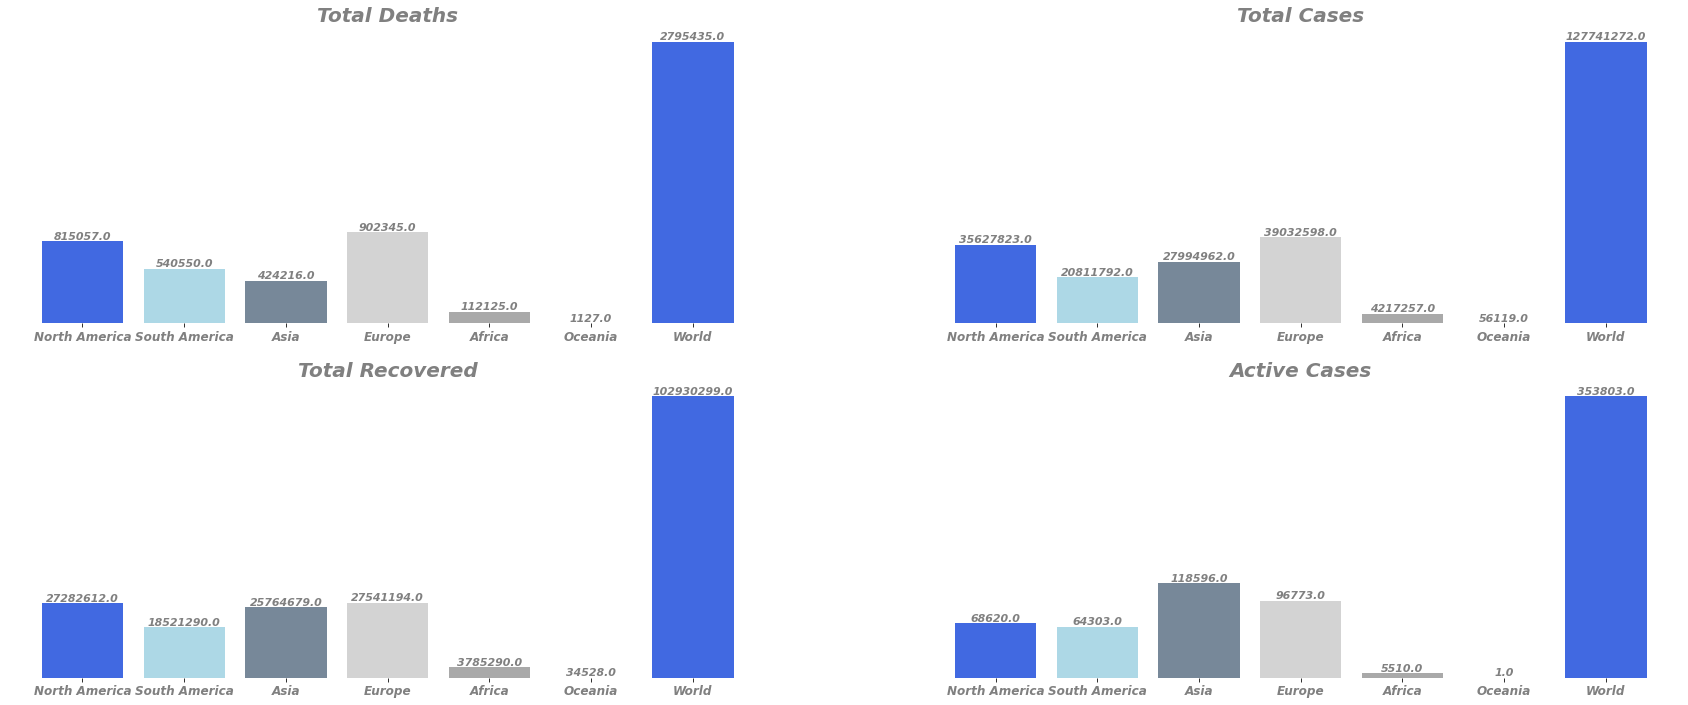

In [173]:
fig, ax = plt.subplots(figsize=(30,25))

ax1 = plt.subplot(4,2,1)
ax1.bar(height = regions['Total Deaths'], x = regions.index, color = cores)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
plt.xticks(fontsize= 12, color='grey', style='oblique', fontweight='bold')
plt.gca().axes.get_yaxis().set_visible(False)
plt.title("Total Deaths", fontsize=20, color='grey', style='oblique', fontweight='bold')
for value, index in enumerate(regions['Total Deaths'].values):
  plt.text(value, index, str(index), ha='center', va='bottom', color='grey', style='oblique', fontweight='bold', fontsize=11)

ax2 = plt.subplot(4,2,2)
ax2.bar(height = regions['Total Cases'], x = regions.index, color = cores)
plt.gca().axes.get_yaxis().set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
plt.xticks(fontsize= 12, color='grey', style='oblique', fontweight='bold')
plt.title("Total Cases", fontsize=20, color='grey', style='oblique', fontweight='bold')
for value, index in enumerate(regions['Total Cases'].values):
  plt.text(value, index, str(index), ha='center', va='bottom', color='grey', style='oblique', fontweight='bold', fontsize=11)

ax3 = plt.subplot(4,2,3)
ax3.bar(height = regions['Total Recovered'], x = regions.index, color = cores)
plt.gca().axes.get_yaxis().set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['left'].set_visible(False)
plt.xticks(fontsize= 12, color='grey', style='oblique', fontweight='bold')
plt.title("Total Recovered", fontsize=20, color='grey', style='oblique', fontweight='bold')
for value, index in enumerate(regions['Total Recovered'].values):
  plt.text(value, index, str(index), ha='center', va='bottom', color='grey', style='oblique', fontweight='bold', fontsize=11)

ax4 = plt.subplot(4,2,4)
ax4.bar(height = regions['Active Cases'], x = regions.index, color = cores)
plt.gca().axes.get_yaxis().set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['bottom'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.spines['left'].set_visible(False)
plt.xticks(fontsize= 12, color='grey', style='oblique', fontweight='bold')
plt.title("Active Cases", fontsize=20, color='grey', style='oblique', fontweight='bold')
for value, index in enumerate(regions['Active Cases'].values):
  plt.text(value, index, str(index), ha='center', va='bottom', color='grey', style='oblique', fontweight='bold', fontsize=11)

plt.show

In [188]:
df2 = df[df.index.isin(['Brazil', 'USA', 'China', 'Vietnam', 'Argentina', 'Germany'])]
df2

,Total Cases,Total Deaths,Total Recovered,Active Cases,Critical Cases,Cases/1M Pop,Deaths/1M Pop,Total Tests,Tests/1M Pop,Population
Country,,,,,,,,,,
USA,30956871.0,562457.0,23408869.0,60160.0,6985545.0,8555.0,93123.0,1692.0,399266586.0,1201049.0
Brazil,12534688.0,312299.0,10912941.0,33314.0,1309448.0,8318.0,58663.0,1462.0,28600000.0,133851.0
Germany,2786345.0,76468.0,2484600.0,7100.0,225277.0,3209.0,33178.0,911.0,48979281.0,583216.0
Argentina,2308597.0,55449.0,2079515.0,7287.0,173633.0,3505.0,50738.0,1219.0,8687916.0,190940.0
Vietnam,2591.0,35.0,2308.0,0.0,248.0,0.0,26.0,0.4,2598753.0,26523.0
China,90167.0,4636.0,85364.0,2.0,167.0,1.0,63.0,3.0,160000000.0,111163.0


<function matplotlib.pyplot.show>

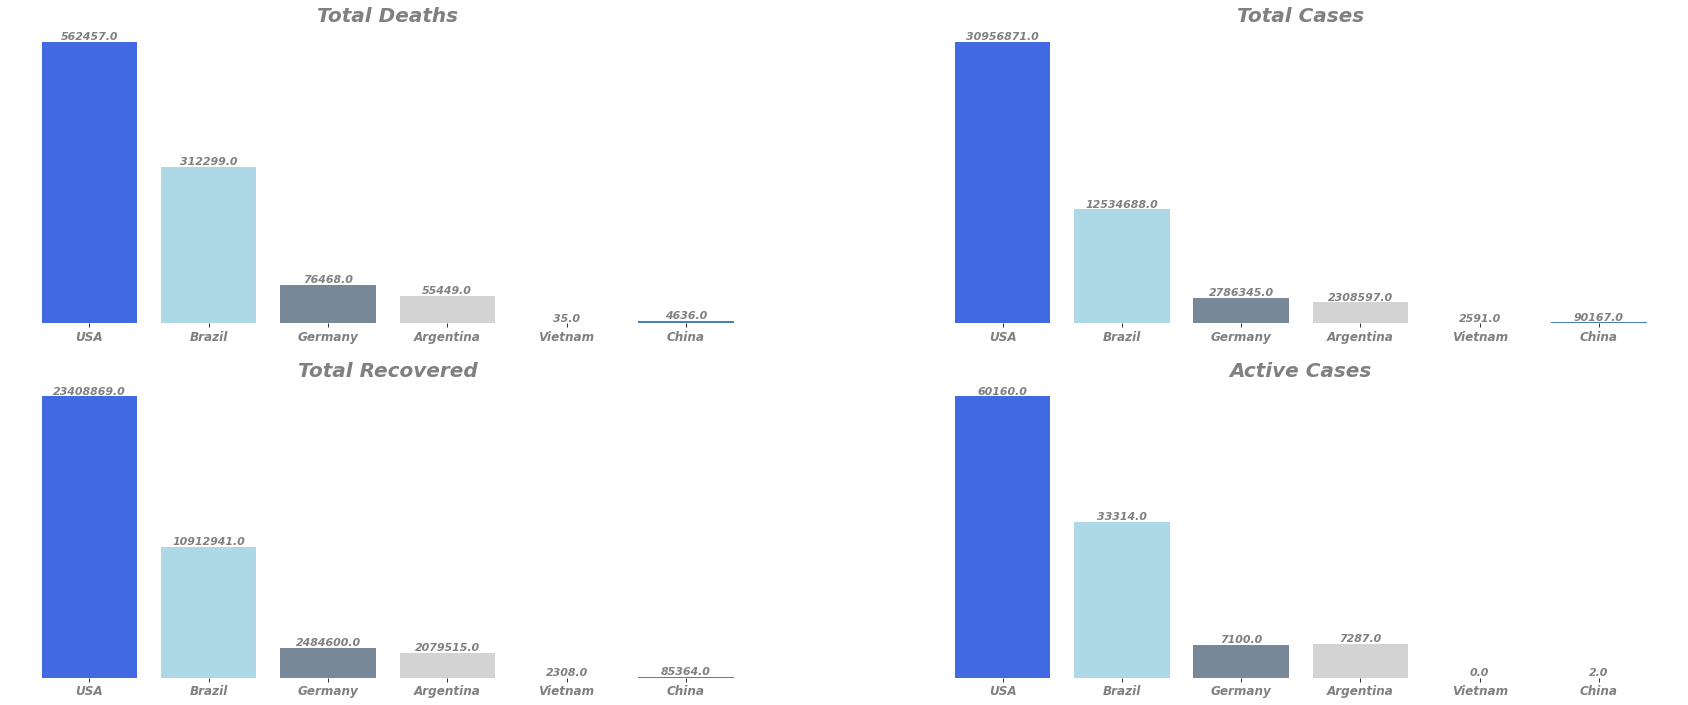

In [189]:
fig, ax = plt.subplots(figsize=(30,25))

ax1 = plt.subplot(4,2,1)
ax1.bar(height = df2['Total Deaths'], x = df2.index, color = cores)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
plt.xticks(fontsize= 12, color='grey', style='oblique', fontweight='bold')
plt.gca().axes.get_yaxis().set_visible(False)
plt.title("Total Deaths", fontsize=20, color='grey', style='oblique', fontweight='bold')
for value, index in enumerate(df2['Total Deaths'].values):
  plt.text(value, index, str(index), ha='center', va='bottom', color='grey', style='oblique', fontweight='bold', fontsize=11)

ax2 = plt.subplot(4,2,2)
ax2.bar(height = df2['Total Cases'], x = df2.index, color = cores)
plt.gca().axes.get_yaxis().set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
plt.xticks(fontsize= 12, color='grey', style='oblique', fontweight='bold')
plt.title("Total Cases", fontsize=20, color='grey', style='oblique', fontweight='bold')
for value, index in enumerate(df2['Total Cases'].values):
  plt.text(value, index, str(index), ha='center', va='bottom', color='grey', style='oblique', fontweight='bold', fontsize=11)

ax3 = plt.subplot(4,2,3)
ax3.bar(height = df2['Total Recovered'], x = df2.index, color = cores)
plt.gca().axes.get_yaxis().set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['left'].set_visible(False)
plt.xticks(fontsize= 12, color='grey', style='oblique', fontweight='bold')
plt.title("Total Recovered", fontsize=20, color='grey', style='oblique', fontweight='bold')
for value, index in enumerate(df2['Total Recovered'].values):
  plt.text(value, index, str(index), ha='center', va='bottom', color='grey', style='oblique', fontweight='bold', fontsize=11)

ax4 = plt.subplot(4,2,4)
ax4.bar(height = df2['Active Cases'], x = df2.index, color = cores)
plt.gca().axes.get_yaxis().set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['bottom'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.spines['left'].set_visible(False)
plt.xticks(fontsize= 12, color='grey', style='oblique', fontweight='bold')
plt.title("Active Cases", fontsize=20, color='grey', style='oblique', fontweight='bold')
for value, index in enumerate(df2['Active Cases'].values):
  plt.text(value, index, str(index), ha='center', va='bottom', color='grey', style='oblique', fontweight='bold', fontsize=11)

plt.show